In [1]:
#!pip install --upgrade matplotlib --user
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tabela Cor ou Raça

In [2]:
# Lendo Tabela de Bairros Cor ou Raça
cor_total = pd.read_csv("data/Agregados_por_bairros_cor_ou_raca_BR.csv", delimiter=";", encoding="ISO-8859-1")
cor_total.head()

,CD_BAIRRO,NM_BAIRRO,V01317,V01318,V01319,V01320,V01321,V01322,V01323,V01324,...,V01402,V01403,V01404,V01405,V01406,V01407,V01408,V01409,V01410,V01411
0,1100015001,Centro,526,72,4,597,12,240,36,4,...,32,0,0,36,0,254,35,0,272,4
1,1100015002,Liberdade,366,58,3,596,6,160,30,0,...,29,0,0,46,0,177,27,0,243,0
2,1100015003,Cidade Alta,424,53,0,789,19,202,33,0,...,26,0,0,70,0,196,18,0,359,6
3,1100015005,Princesa Isabel,926,169,0,1702,44,457,96,0,...,56,3,0,122,4,413,68,0,712,19
4,1100015006,Redondo,884,176,3,1273,22,398,96,0,...,78,0,0,90,0,408,78,0,574,8


In [3]:
cor_total['CD_BAIRRO'] = cor_total['CD_BAIRRO'].astype(str)
cor_total.dtypes

CD_BAIRRO    object
NM_BAIRRO    object
V01317       object
V01318       object
V01319       object
              ...  
V01407       object
V01408       object
V01409       object
V01410       object
V01411       object
Length: 97, dtype: object

In [4]:
cor = cor_total[cor_total['CD_BAIRRO'].str.startswith('250400', na=False)]
cor.head(5)

,CD_BAIRRO,NM_BAIRRO,V01317,V01318,V01319,V01320,V01321,V01322,V01323,V01324,...,V01402,V01403,V01404,V01405,V01406,V01407,V01408,V01409,V01410,V01411
3603,2504009001,Centro de Campina Grande,3664,267,23,2204,0,1564,130,13,...,123,3,0,69,0,1959,112,7,1069,0
3604,2504009002,Alto Branco,3784,552,31,3966,6,1708,292,11,...,233,14,0,242,0,1843,242,16,1827,0
3605,2504009003,Araxá,702,251,4,1439,0,351,132,0,...,73,11,0,137,0,278,108,3,591,0
3606,2504009004,Bela Vista,2878,465,11,2678,0,1288,234,0,...,183,5,0,181,0,1407,218,4,1223,0
3607,2504009005,Bodocongó,5641,955,55,7560,10,2523,486,17,...,328,14,0,430,0,2790,436,30,3577,6


In [5]:
cor = cor[['CD_BAIRRO', 'NM_BAIRRO', 'V01317', 'V01318', 'V01319', 'V01320', 'V01321']]
cor.head(5)

,CD_BAIRRO,NM_BAIRRO,V01317,V01318,V01319,V01320,V01321
3603,2504009001,Centro de Campina Grande,3664,267,23,2204,0
3604,2504009002,Alto Branco,3784,552,31,3966,6
3605,2504009003,Araxá,702,251,4,1439,0
3606,2504009004,Bela Vista,2878,465,11,2678,0
3607,2504009005,Bodocongó,5641,955,55,7560,10


In [6]:
cor = cor.rename(columns={'V01317': 'Branca', 'V01318': 'Preta', 'V01319': 'Amarela', 'V01320': 'Parda', 'V01321': 'Indígena'})
cor['Branca'] = cor['Branca'].astype(int)
cor['Preta'] = cor['Preta'].astype(int)
cor['Amarela'] = cor['Amarela'].astype(int)
cor['Parda'] = cor['Parda'].astype(int)
cor['Indígena'] = cor['Indígena'].astype(int)
cor.dtypes

CD_BAIRRO    object
NM_BAIRRO    object
Branca        int64
Preta         int64
Amarela       int64
Parda         int64
Indígena      int64
dtype: object

In [7]:
#cor.set_index("NM_BAIRRO", inplace=True)
#cor.head(5)

In [8]:
cor['Total'] = cor['Branca'] + cor['Preta'] + cor['Amarela'] + cor['Parda'] + cor['Indígena']
cor.head(5)

,CD_BAIRRO,NM_BAIRRO,Branca,Preta,Amarela,Parda,Indígena,Total
3603,2504009001,Centro de Campina Grande,3664,267,23,2204,0,6158
3604,2504009002,Alto Branco,3784,552,31,3966,6,8339
3605,2504009003,Araxá,702,251,4,1439,0,2396
3606,2504009004,Bela Vista,2878,465,11,2678,0,6032
3607,2504009005,Bodocongó,5641,955,55,7560,10,14221


In [9]:
cor['%Branca'] = cor['Branca'] / cor['Total']
cor.head()

,CD_BAIRRO,NM_BAIRRO,Branca,Preta,Amarela,Parda,Indígena,Total,%Branca
3603,2504009001,Centro de Campina Grande,3664,267,23,2204,0,6158,0.594998
3604,2504009002,Alto Branco,3784,552,31,3966,6,8339,0.453771
3605,2504009003,Araxá,702,251,4,1439,0,2396,0.292988
3606,2504009004,Bela Vista,2878,465,11,2678,0,6032,0.477122
3607,2504009005,Bodocongó,5641,955,55,7560,10,14221,0.396667


In [10]:
cor['%PretaEParda'] = (cor['Preta']+cor['Parda']) / cor['Total']
cor.head()

,CD_BAIRRO,NM_BAIRRO,Branca,Preta,Amarela,Parda,Indígena,Total,%Branca,%PretaEParda
3603,2504009001,Centro de Campina Grande,3664,267,23,2204,0,6158,0.594998,0.401267
3604,2504009002,Alto Branco,3784,552,31,3966,6,8339,0.453771,0.541792
3605,2504009003,Araxá,702,251,4,1439,0,2396,0.292988,0.705342
3606,2504009004,Bela Vista,2878,465,11,2678,0,6032,0.477122,0.521054
3607,2504009005,Bodocongó,5641,955,55,7560,10,14221,0.396667,0.598762


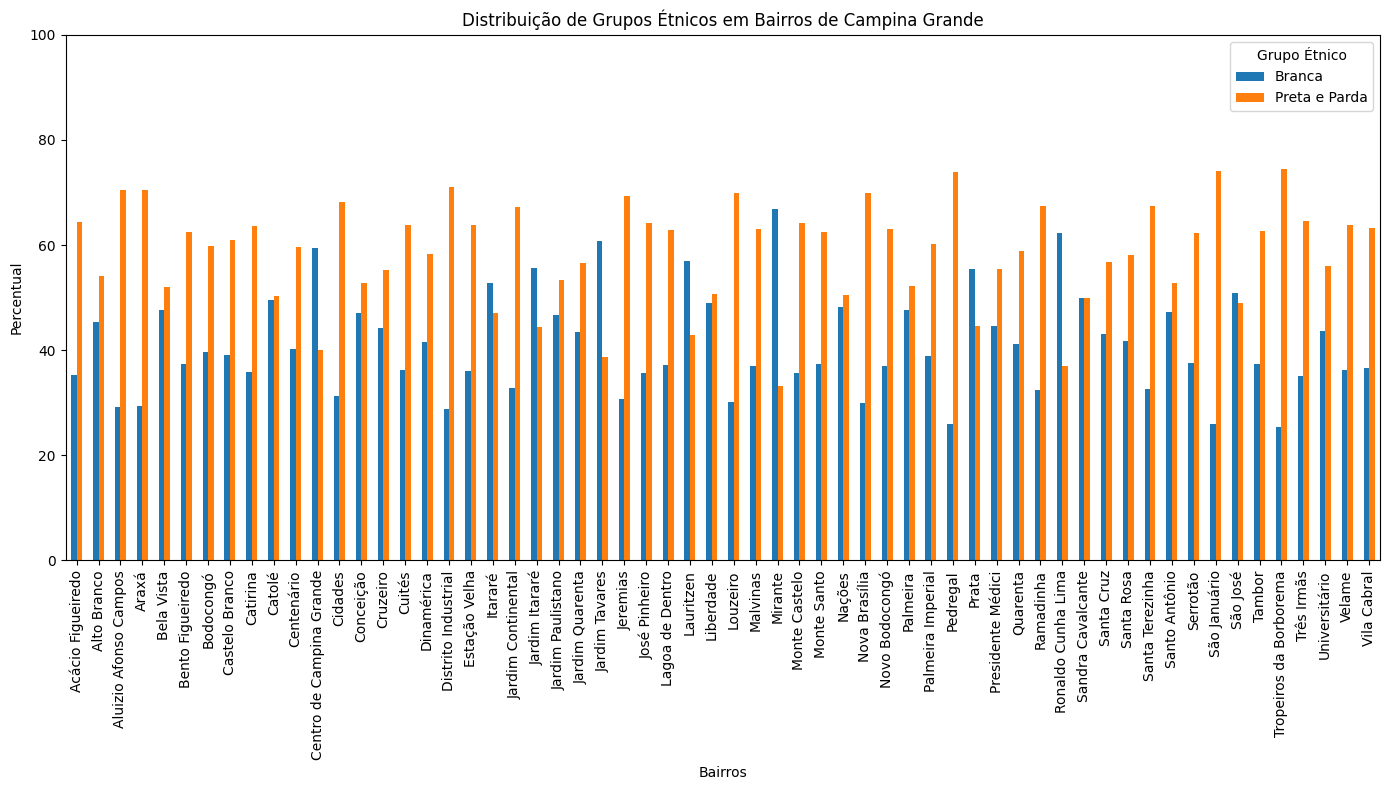

In [11]:
# Plotando todos os dados com percentual formatado
cor_sorted = cor.sort_values("NM_BAIRRO")
cor_sorted['percent_branca'] = cor_sorted['%Branca'] * 100
cor_sorted['percent_pretaeparda'] = cor_sorted['%PretaEParda'] * 100
ax = cor_sorted.plot(x="NM_BAIRRO", y = ["percent_branca", "percent_pretaeparda"], kind="bar", figsize=(14,8))
ax.legend(["Branca", "Preta e Parda"], title="Grupo Étnico")
plt.ylabel("Percentual")
plt.xlabel("Bairros")
plt.ylim(0,100)
plt.title("Distribuição de Grupos Étnicos em Bairros de Campina Grande")
plt.tight_layout()
plt.show()

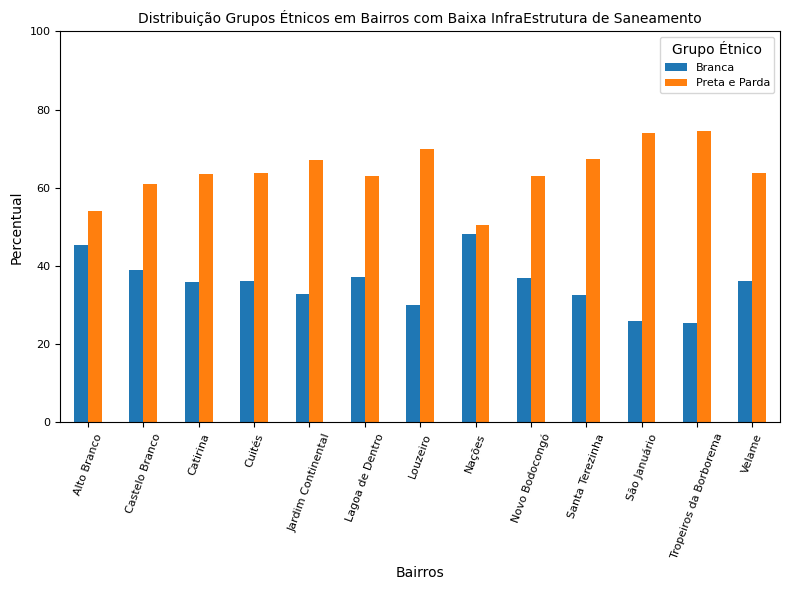

In [12]:
# Plotando dados filtrados com percentual formatado
cor_1 = cor_sorted[cor_sorted['NM_BAIRRO'].isin(['Velame', 'Alto Branco', 'Castelo Branco', 'Catirina', 'Cuités', 'Jardim Continental', 'Lagoa de Dentro', 'Louzeiro', 'Nações', 'Novo Bodocongó', 'Santa Terezinha', 'São Januário', 'Tropeiros da Borborema'])]
ax = cor_1.plot(x="NM_BAIRRO", y = ["percent_branca", "percent_pretaeparda"], kind="bar", figsize=(8,6))
ax.legend(["Branca", "Preta e Parda"], title="Grupo Étnico", fontsize=8)
plt.ylabel("Percentual", fontsize=10)
plt.xlabel("Bairros", fontsize=10)
plt.tight_layout()
plt.ylim(0,100)
plt.title("Distribuição Grupos Étnicos em Bairros com Baixa InfraEstrutura de Saneamento", fontsize=10)
plt.xticks(fontsize=8, rotation=70)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Tabelas Esgoto

In [13]:
domicilio = pd.read_table('data/Agregados_por_bairros_caracteristicas_domicilio2_BR.csv', delimiter=";", encoding="ISO-8859-1")
domicilio.head()

,CD_BAIRRO,NM_BAIRRO,V00090,V00091,V00092,V00093,V00094,V00095,V00096,V00097,...,V00486,V00487,V00488,V00489,V00490,V00491,V00492,V00493,V00494,V00495
0,1100015001,Centro,204,35,0,228,0,0,0,0,...,161,47,15,0,0,0,0,0,480,0
1,1100015002,Liberdade,137,29,3,220,0,0,0,0,...,92,23,4,0,0,0,0,0,391,0
2,1100015003,Cidade Alta,163,28,0,299,4,0,0,0,...,50,12,0,0,0,0,0,0,498,0
3,1100015005,Princesa Isabel,360,69,0,611,12,0,0,0,...,110,6,3,0,0,0,0,0,1057,0
4,1100015006,Redondo,303,85,0,469,4,0,0,0,...,233,40,4,0,0,0,0,0,871,0


In [14]:
domicilio['CD_BAIRRO'] = domicilio['CD_BAIRRO'].astype(str)
esgoto = domicilio[domicilio['CD_BAIRRO'].str.startswith('250400', na=False)]
esgoto.head(5)

,CD_BAIRRO,NM_BAIRRO,V00090,V00091,V00092,V00093,V00094,V00095,V00096,V00097,...,V00486,V00487,V00488,V00489,V00490,V00491,V00492,V00493,V00494,V00495
3603,2504009001,Centro de Campina Grande,446,16,0,255,0,6,3,0,...,722,533,250,78,8,0,0,0,2746,9
3604,2504009002,Alto Branco,878,202,10,1119,0,20,0,0,...,959,427,234,70,15,4,0,0,2858,3
3605,2504009003,Araxá,194,99,0,426,0,0,0,0,...,69,4,0,0,0,0,0,0,721,8
3606,2504009004,Bela Vista,464,155,0,573,0,30,24,3,...,586,339,139,58,8,0,0,0,2277,6
3607,2504009005,Bodocongó,1444,309,13,2045,0,6,0,0,...,1726,239,49,3,0,0,0,0,5108,3


In [15]:
int_columns = [f"V00"+str(i) for i in range(341,381)]
column_list = ['CD_BAIRRO', 'NM_BAIRRO'] + int_columns
esgoto = esgoto[column_list]
esgoto.head()

,CD_BAIRRO,NM_BAIRRO,V00341,V00342,V00343,V00344,V00345,V00346,V00347,V00348,...,V00371,V00372,V00373,V00374,V00375,V00376,V00377,V00378,V00379,V00380
3603,2504009001,Centro de Campina Grande,1544,130,7,1041,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,2504009002,Alto Branco,979,166,11,1012,0,19,3,0,...,51,24,0,121,0,0,0,0,0,0
3605,2504009003,Araxá,157,75,0,335,0,0,0,0,...,5,0,0,20,0,0,0,0,0,0
3606,2504009004,Bela Vista,1015,197,3,979,0,0,0,0,...,7,12,0,20,0,0,0,0,0,0
3607,2504009005,Bodocongó,1747,370,20,2465,0,8,0,0,...,61,13,0,84,0,0,0,0,0,0


In [16]:
esgoto[int_columns] = esgoto[int_columns].astype(int)
esgoto.dtypes

CD_BAIRRO    object
NM_BAIRRO    object
V00341        int64
V00342        int64
V00343        int64
V00344        int64
V00345        int64
V00346        int64
V00347        int64
V00348        int64
V00349        int64
V00350        int64
V00351        int64
V00352        int64
V00353        int64
V00354        int64
V00355        int64
V00356        int64
V00357        int64
V00358        int64
V00359        int64
V00360        int64
V00361        int64
V00362        int64
V00363        int64
V00364        int64
V00365        int64
V00366        int64
V00367        int64
V00368        int64
V00369        int64
V00370        int64
V00371        int64
V00372        int64
V00373        int64
V00374        int64
V00375        int64
V00376        int64
V00377        int64
V00378        int64
V00379        int64
V00380        int64
dtype: object